In [17]:
from sympy import *
from dtumathtools import *
#from august import *
init_printing()

x, y, z, a, b, c = symbols('x y z a b c')
k, w = symbols('k w', real=True)
f, m, t, delta = symbols('f m t delta', real=True, positive=True)
xi = symbols('xi', real=True)
k_s = symbols('k_s', real=True, positive=True)

https://www.youtube.com/watch?v=FQgG9tPZ-I4&t=2111s
https://www.youtube.com/watch?v=cD41LXKSyVU&list=PLOr3fZwA0ZzIIXOFcY5t6Zk1PxhhzTrvX&index=10

In [18]:
k1, k2, kc, kb2, l1, l2, lg, it = symbols('k_1 k_2 k_c k_{b2} l_1 l_2 l_g I_t', real=True, positive=True)
m2, mr, g, u, w, t, phiu = symbols('m_2 m_r g u omega t phi_u', real=True, positive=True)
ffhm = symbols('F_FHM')
kk3 = l2**(-2)*(kc+l1**2*k1-lg*mr*g)

y1, y2 = Function('y_1')(t), Function('y_2')(t)
z1, z2 = Function('z_1')(t), Function('z_2')(t)

M = Matrix([[l2**(-2)*it, 0], [0, m2]])
K = Matrix([[k2+l2**(-2)*(kc+l1**2*k1-lg*mr*g), -k2], [-k2, k2+kb2]])
ft = Matrix([l2**(-1)*u*w**2*sin(w*t+phiu), 0])
yt = Matrix([y1, y2])
zt = Matrix([z1, z2])

M, K, ft, yt, zt

⎛⎡ Iₜ    ⎤  ⎡                      2                   ⎤  ⎡ 2                ⎤
⎜⎢───  0 ⎥  ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c             ⎥  ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
⎜⎢  2    ⎥  ⎢k₂ + ────────────────────────      -k₂    ⎥  ⎢──────────────────⎥
⎜⎢l₂     ⎥, ⎢                 2                        ⎥, ⎢        l₂        ⎥
⎜⎢       ⎥  ⎢               l₂                         ⎥  ⎢                  ⎥
⎜⎣ 0   m₂⎦  ⎢                                          ⎥  ⎣        0         ⎦
⎝           ⎣             -k₂               k₂ + k_{b2}⎦                      

                  ⎞
                  ⎟
  ⎡y₁(t)⎤  ⎡z₁(t)⎤⎟
, ⎢     ⎥, ⎢     ⎥⎟
  ⎣y₂(t)⎦  ⎣z₂(t)⎦⎟
                  ⎟
                  ⎠

In [19]:
k2, k3, k4, k5 = symbols('k_2 k_3 k_4 k_5')
f1, f2 = symbols('f_1 f_2', real=True)
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4]])
FFHM = Matrix([[0, 0],[0, k5]])
f = Matrix([f1, f2])
f_re = re(f * (cos(w*t) + I*sin(w*t)))
f_sol = solve([Eq(f_re[0], ft[0]), Eq(f_re[1], ft[1])], [f1, f2])
f_til = f.subs(f_sol)
K_til = K + FFHM
f_til, K_til

⎛⎡ 2                ⎤                         ⎞
⎜⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥                         ⎟
⎜⎢──────────────────⎥  ⎡k₂ + k₃      -k₂     ⎤⎟
⎜⎢   l₂⋅cos(ω⋅t)    ⎥, ⎢                     ⎥⎟
⎜⎢                  ⎥  ⎣  -k₂    k₂ + k₄ + k₅⎦⎟
⎝⎣        0         ⎦                         ⎠

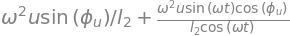

In [20]:
f_til[0].expand(trig=True)

In [21]:
diff_eq = Eq(Add(MatMul(M,yt), MatMul(K_til,yt), evaluate=False), f_til)
diff_eq

⎡ Iₜ    ⎤                                             ⎡ 2                ⎤
⎢───  0 ⎥                                             ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
⎢  2    ⎥ ⎡y₁(t)⎤   ⎡k₂ + k₃      -k₂     ⎤ ⎡y₁(t)⎤   ⎢──────────────────⎥
⎢l₂     ⎥⋅⎢     ⎥ + ⎢                     ⎥⋅⎢     ⎥ = ⎢   l₂⋅cos(ω⋅t)    ⎥
⎢       ⎥ ⎣y₂(t)⎦   ⎣  -k₂    k₂ + k₄ + k₅⎦ ⎣y₂(t)⎦   ⎢                  ⎥
⎣ 0   m₂⎦                                             ⎣        0         ⎦

In [22]:
eta, ks, Fs0, hp, cs = symbols('eta k_s F_{0s} h_p c_s', real=True, positive=True)
kk = ks*(1 + eta*I) + Fs0 / hp * (1 + cs)
kk

In [23]:
diff_eq.subs({k3: kk3, k4: kb2, k5: Mul(2,kk, evaluate=False)})

                    ⎡                      2                                  
⎡ Iₜ    ⎤           ⎢     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c                            
⎢───  0 ⎥           ⎢k₂ + ────────────────────────                        -k₂ 
⎢  2    ⎥ ⎡y₁(t)⎤   ⎢                 2                                       
⎢l₂     ⎥⋅⎢     ⎥ + ⎢               l₂                                        
⎢       ⎥ ⎣y₂(t)⎦   ⎢                                                         
⎣ 0   m₂⎦           ⎢                                               ⎛F_{0s}⋅(c
                    ⎢             -k₂               k₂ + k_{b2} + 2⋅⎜─────────
                    ⎣                                               ⎝       hₚ

                      ⎤                               
                      ⎥           ⎡ 2                ⎤
                      ⎥           ⎢ω ⋅u⋅sin(ω⋅t + φᵤ)⎥
                      ⎥ ⎡y₁(t)⎤   ⎢──────────────────⎥
                      ⎥⋅⎢     ⎥ = ⎢   l₂⋅cos(ω⋅t)    ⎥
             

In [24]:
M, K_til

⎛⎡ Iₜ    ⎤                         ⎞
⎜⎢───  0 ⎥                         ⎟
⎜⎢  2    ⎥  ⎡k₂ + k₃      -k₂     ⎤⎟
⎜⎢l₂     ⎥, ⎢                     ⎥⎟
⎜⎢       ⎥  ⎣  -k₂    k₂ + k₄ + k₅⎦⎟
⎝⎣ 0   m₂⎦                         ⎠

In [25]:
la = symbols('lambda')
A = - M.inv() * K_til
AE = A - eye(2) * la
AE

⎡       2                      2      ⎤
⎢     l₂ ⋅(k₂ + k₃)       k₂⋅l₂       ⎥
⎢-λ - ─────────────       ──────      ⎥
⎢           Iₜ              Iₜ        ⎥
⎢                                     ⎥
⎢        k₂               k₂ + k₄ + k₅⎥
⎢        ──          -λ - ────────────⎥
⎣        m₂                    m₂     ⎦

In [26]:
A_func = A.subs({k3: kk3, k4: kb2, k5: 2*kk})
A_func

⎡     ⎛                      2      ⎞                                         
⎢   2 ⎜     -g⋅l_g⋅mᵣ + k₁⋅l₁  + k_c⎟                                         
⎢-l₂ ⋅⎜k₂ + ────────────────────────⎟                                         
⎢     ⎜                 2           ⎟                               2         
⎢     ⎝               l₂            ⎠                          k₂⋅l₂          
⎢─────────────────────────────────────                         ──────         
⎢                  Iₜ                                            Iₜ           
⎢                                                                             
⎢                                        ⎛2⋅F_{0s}⋅(cₛ + 1)                   
⎢                                       -⎜───────────────── + k₂ + 2⋅kₛ⋅(ⅈ⋅η +
⎢                 k₂                     ⎝        hₚ                          
⎢                 ──                    ──────────────────────────────────────
⎣                 m₂                                

# 4.2 Omskrives til komplekst

In [27]:
m1_, m2_, la_ = symbols('m_1 m_2 lambda')
M = Matrix([[m1_, 0],[0, m2_]])
K = Matrix([[k2 + k3, -k2], [-k2, k2 + k4 + k5]])
M, K

⎛⎡m₁  0 ⎤  ⎡k₂ + k₃      -k₂     ⎤⎞
⎜⎢      ⎥, ⎢                     ⎥⎟
⎝⎣0   m₂⎦  ⎣  -k₂    k₂ + k₄ + k₅⎦⎠

In [28]:
v1, v2 = symbols('v_1 v_2')
V = Matrix([v1, v2])
Mul(MatAdd(la_ * M, K), V, evaluate=False)

⎛⎡λ⋅m₁   0  ⎤   ⎡k₂ + k₃      -k₂     ⎤⎞ ⎡v₁⎤
⎜⎢          ⎥ + ⎢                     ⎥⎟⋅⎢  ⎥
⎝⎣ 0    λ⋅m₂⎦   ⎣  -k₂    k₂ + k₄ + k₅⎦⎠ ⎣v₂⎦

4.4

In [42]:
mydict = {g:9.81,kc:0.7,u:14.8*10**(-6),
          phiu:7,mr:0.616,m2:1.410,it:31.2*10**(-3),
          lg:0.188,l1:0.118,l2:0.263,
          kb2:0.72*10**(3),k1:1.66*10**3,k2:1.61*10**3,
          hp:12*10**(-3), cs:0.24}
v30 = {ks:0.83, eta:33, Fs0:5.2}
v50 = {ks:0.995, eta:21, Fs0:8}
v70 = {ks:1.37, eta:10.5, Fs0:9.65}
v30, v50, v70

In [43]:
display(K_til.subs(mydict), M.subs(mydict))

⎡k₃ + 1610.0      -1610.0     ⎤
⎢                             ⎥
⎣  -1610.0    k₄ + k₅ + 1610.0⎦

⎡m₁  0 ⎤
⎢      ⎥
⎣0   m₂⎦

In [44]:
A_func.subs(mydict).eigenvects()

⎡⎛                                                                            
⎢⎜                                                                            
⎢⎜-73.2860520094565⋅F_{0s} - 0.709219858156028⋅ⅈ⋅η⋅kₛ - 0.709219858156028⋅kₛ -
⎢⎜                                                                            
⎣⎝                                                                            

                                                                              
                  ⎛                           2                               
 2413.05299808499⋅⎝0.000922377991753893⋅F_{0s}  + 1.78524772597527e-5⋅ⅈ⋅F_{0s}
                                                                              
                                                                              

                                                                              
                                                                              
⋅η⋅kₛ + 1.78524772597527e-5⋅F_{0s}⋅kₛ - 0.03327318

In [45]:
la_sol30 = list(A_func.subs(mydict).subs(v30).eigenvals().keys())
la_sol50 = list(A_func.subs(mydict).subs(v50).eigenvals().keys())
la_sol70 = list(A_func.subs(mydict).subs(v70).eigenvals().keys())
la_sol30, la_sol50, la_sol70

4.5

In [46]:
la11, la12, la21, la22 = sqrt(la_sol30[0]), -sqrt(la_sol30[0]), sqrt(la_sol30[1]), -sqrt(la_sol30[1])
la11, la12, la21, la22

In [47]:
xi11_30 = - re(la11)/abs(la11)
xi12_30 = - re(la12)/abs(la12)
xi21_30 = - re(la21)/abs(la21)
xi22_30 = - re(la22)/abs(la22)
xi11_30, xi12_30, xi21_30, xi22_30

In [48]:
wn12 = abs(sqrt(la12))
wn22 = abs(sqrt(la22))
wn12, wn22

In [49]:
wd12 = abs(im(sqrt(la12)))
wd22 = abs(im(sqrt(la22)))
wd12, wd22

In [50]:
la30 = [-sqrt(la_sol30[0]), -sqrt(la_sol30[1])]
la50 = [-sqrt(la_sol50[0]), -sqrt(la_sol50[1])]
la70 = [-sqrt(la_sol70[0]), -sqrt(la_sol70[1])]
la30, la50, la70

In [51]:
xi30 = [- re(la30[0])/abs(la30[0]), - re(la30[1])/abs(la30[1])]
xi50 = [- re(la50[0])/abs(la50[0]), - re(la50[1])/abs(la50[1])]
xi70 = [- re(la70[0])/abs(la70[0]), - re(la70[1])/abs(la70[1])]
wn30hz = [abs(sqrt(la30[0]))/(2*pi), abs(sqrt(la30[1]))/(2*pi)]
wn50hz = [abs(sqrt(la50[0]))/(2*pi), abs(sqrt(la50[1]))/(2*pi)]
wn70hz = [abs(sqrt(la70[0]))/(2*pi), abs(sqrt(la70[1]))/(2*pi)]
wn30hz, wn50hz, wn70hz 

In [52]:
x = [30, 30, 50, 50, 70, 70]
y = [wn30hz[0] ,wn30hz[1], wn50hz[0], wn50hz[1], wn70hz[0], wn70hz[1]]
x, y

In [53]:
x_xi = [30, 30, 50, 50, 70, 70]
y_xi = [xi30[0], xi30[1], xi50[0], xi50[1], xi70[0], xi70[1]]
x_xi, y_xi

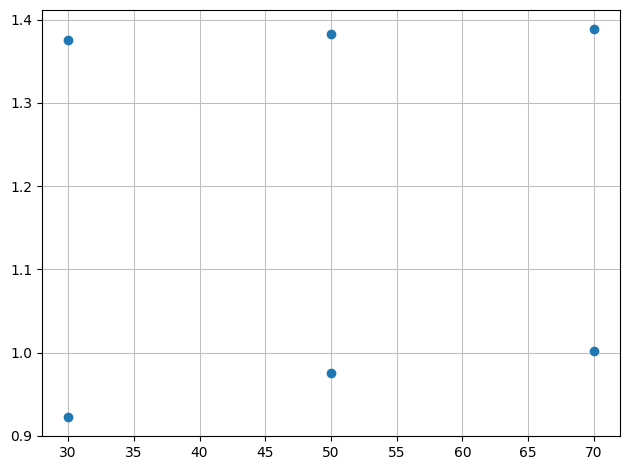

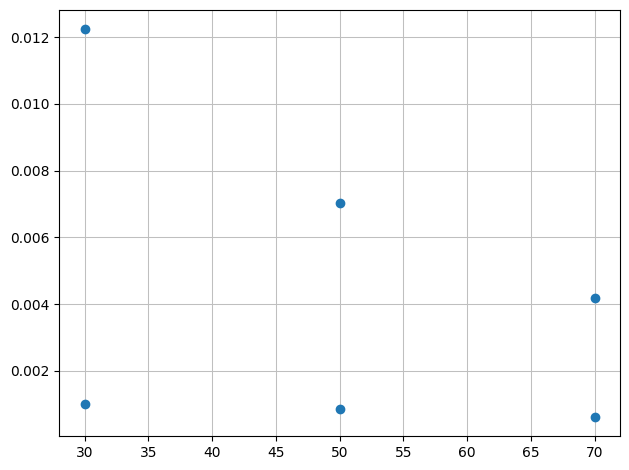

In [54]:
dtuplot.scatter(x, y)
dtuplot.scatter(x_xi, y_xi)